# Tiles Recongnition
Recongize tiles using YOLO

### Environment Setup

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

image_path = "C:\\Users\\tfgmo\\OneDrive - Virginia Tech\\Mahjong CV\\chopped_clean_data\\000004.png"

In [13]:
def detect_objects(image_path, model_name='yolo11x', conf_threshold=0.25):
    """
    使用预训练 YOLO 模型对图像进行对象检测
    :param image_path: 输入图片路径
    :param model_name: 预训练模型名称，例如 'yolov8n', 'yolov5s'
    :param conf_threshold: 置信度阈值，过滤低于该值的检测
    """
    # 加载预训练模型
    model = YOLO(model_name + '.pt')  # 例如 'yolov8n.pt'

    # 读取图像
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 使用模型进行推理
    results = model.predict(source=image_path, conf=conf_threshold)

    # 获取检测结果
    boxes = results[0].boxes  # 检测到的边界框
    labels = results[0].names  # 类别标签
    image_with_boxes = results[0].plot()  # 绘制边界框的图片

    # 显示结果
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detection Results")
    plt.show()

    # 打印检测到的对象
    for box in boxes:
        cls = int(box.cls)  # 类别索引
        conf = float(box.conf)  # 置信度
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 边界框坐标
        print(f"Class: {labels[cls]}, Confidence: {conf:.2f}, Box: [{x1}, {y1}, {x2}, {y2}]")



image 1/1 C:\Users\tfgmo\OneDrive - Virginia Tech\Mahjong CV\chopped_clean_data\000004.png: 640x640 (no detections), 32.5ms
Speed: 2.0ms preprocess, 32.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


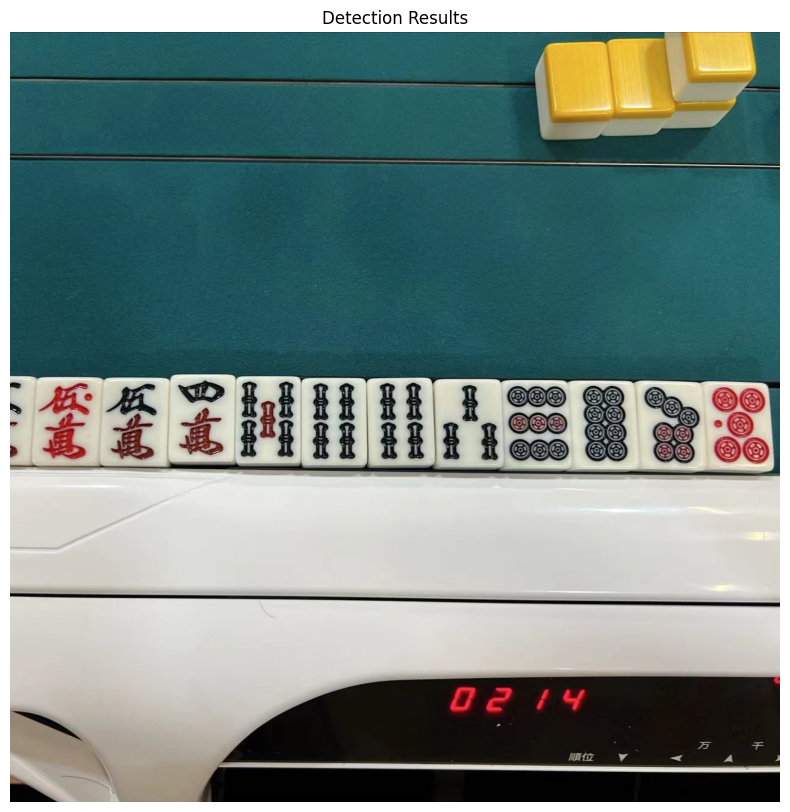

In [14]:
detect_objects(image_path)